In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import pandas as pd
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
from astropy import units as u
from astropy import constants as c

/Users/haoyushen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = "/Users/haoyushen/Desktop/research UTD Tidal Dissipation /data/data from new catalouge of EBs.tsv"   # adjust as needed
df_1 = pd.read_csv(
    file_path,
    sep="|",
    engine="python",
    comment="#",
    na_values=["", "na", "null"]
)
df_1 = df_1.fillna(0)
df_1['logk2,1'] = df_1['logk2']
df_1['logk2,2'] = df_1['logk2']
print(df_1.head())
print(df_1.columns)

   Seq           Name           T0 n_T0      e_T0           Ps         e_Ps  \
0                                d              d            d            d   
1  ---  -------------  -----------    -  --------  -----------  -----------   
2    1  BW Aqr         44545.52150        0.00060   6.71969500                
3    2  V871 Aql       38637.14890        0.00090   2.95266980   0.00000120   
4    3  V889 Aql       38241.74390        0.00060  11.12079370   0.00000250   

            Pa         e_Pa l_e  ...      DEJ2000    mag   Dmag Filt  \
0            d            d      ...        d:m:s    mag    mag        
1  -----------  -----------   -  ...  -----------  -----  -----   --   
2   6.71971200   0.00000300      ...  -15 19 56.1  10.86   0.46   Hp   
3   2.95276330   0.00000120      ...  -03 09 28.0  13.30   1.20   P    
4  11.12080760   0.00000250      ...  +16 15 00.0   8.52   0.58   V    

             SpType        Type   Ref1  Simbad logk2,1 logk2,2  
0                          

In [99]:
iso_df.columns

Index(['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe',
       'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2',
       'period3', 'period4', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn',
       'Xo', 'Cexcess', 'Z', 'mbolmag', 'Umag', 'Bmag', 'Vmag', 'Rmag', 'Imag',
       'Jmag', 'Hmag', 'Kmag'],
      dtype='object')

In [95]:
iso_df = pd.read_csv('/Users/haoyushen/Desktop/research UTD Tidal Dissipation /data/isochrone table.csv')

In [97]:
fs_df = pd.read_excel('/Users/haoyushen/Desktop/research UTD Tidal Dissipation /data/data 54 systems.xlsx')

In [ ]:
for col in ['T1','T2','logg1','logg2']:
    fs_df[col] = pd.to_numeric(fs_df[col], errors='coerce')

# compute log10 temperatures
fs_df['logT1'] = np.log10(fs_df['T1'])
fs_df['logT2'] = np.log10(fs_df['T2'])

# coerce the isochrone grid columns to numeric as well
for col in ['logTe','Mass']:
    iso_df[col] = pd.to_numeric(iso_df[col], errors='coerce')
pts = iso_df[['logTe']].dropna().values
mass_vals = iso_df.dropna(subset=['logTe','Mass'])['Mass'].values


In [4]:
KKdf = pd.read_excel('/Users/haoyushen/Desktop/research UTD Tidal Dissipation /data/K&K data.xlsx')
KKdf = KKdf.drop(columns = ['Seq'])
KKdf['T1'] = (10**KKdf['logT1']).values
KKdf['T2'] = (10**KKdf['logT2']).values
KKdf = KKdf.drop(columns = ['logT1'])
KKdf = KKdf.drop(columns = ['logT2'])
print(KKdf.columns)

Index(['Name', 'Ps', 'M1', 'M2', 'R1', 'R2', 'logg1', 'logg2', 'r1', 'r2', 'e',
       'U', 'logk2,1', 'logk2,2', 'logm1', 'logm2', 'T1', 'T2'],
      dtype='object')


In [6]:
df = pd.concat([df_1, KKdf], ignore_index=True, sort=False)

In [93]:
for col in ['T1','T2','logg1','logg2']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# compute log10 temperatures
df['logT1'] = np.log10(df['T1'])
df['logT2'] = np.log10(df['T2'])

# coerce the isochrone grid columns to numeric as well
for col in ['logg','logTe','logAge','MH']:
    iso_df[col] = pd.to_numeric(iso_df[col], errors='coerce')

# build interpolation arrays from the full grid
pts      = iso_df[['logg','logTe']].dropna().values
age_vals = iso_df.dropna(subset=['logg','logTe','logAge'])['logAge'].values
mh_vals  = iso_df.dropna(subset=['logg','logTe','MH'])['MH'].values

# query points from your catalogue (T1 & T2 pairs)
orig1 = df[['logg1','logT1']].values
orig2 = df[['logg2','logT2']].values

# do the interpolation
df['logAge_interp_1'] = griddata(pts, age_vals, orig1, method='linear')
df['logAge_interp_2'] = griddata(pts, age_vals, orig2, method='linear')
df['MH_interp_1']     = griddata(pts, mh_vals,  orig1, method='linear')
df['MH_interp_2']     = griddata(pts, mh_vals,  orig2, method='linear')

# average the two estimates
df['logAge'] = df[['logAge_interp_1','logAge_interp_2']].mean(axis=1)
df['MH']     = df[['MH_interp_1','MH_interp_2']].mean(axis=1)


In [92]:
print(df.columns)

Index(['Seq', 'Name', 'T0', 'n_T0', 'e_T0', 'Ps', 'e_Ps', 'Pa', 'e_Pa', 'l_e',
       'e', 'e_e', 'omega', 'e_omega', 'n_U', 'l_U', 'U', 'e_U', 'logk2',
       'e_logk2', 'Ref2', 'M1', 'e_M1', 'M2', 'e_M2', 'R1', 'e_R1', 'R2',
       'e_R2', 'T1', 'e_T1', 'T2', 'e_T2', 'logg1', 'e_logg1', 'logg2',
       'e_logg2', 'Ref4', 'HD', 'HIP', 'RAJ2000', 'DEJ2000', 'mag', 'Dmag',
       'Filt', 'SpType', 'Type', 'Ref1', 'Simbad', 'logk2,1', 'logk2,2', 'r1',
       'r2', 'logm1', 'logm2', 'logT1', 'logT2', 'logAge_interp_1',
       'logAge_interp_2', 'MH_interp_1', 'MH_interp_2', 'logAge', 'MH'],
      dtype='object')


In [10]:
#Strings to numeric number
for col in ["U", "Ps", "e_Ps", "e", "e_e","e_U",'M1', 'e_M1', 'M2', 'e_M2','MH','logAge','R1','R2', 'logk2,1', 'logk2,2']:
    df[col] = pd.to_numeric(df[col], errors="coerce")   # bad entries → NaN

In [11]:
print(df.columns)

Index(['Seq', 'Name', 'T0', 'n_T0', 'e_T0', 'Ps', 'e_Ps', 'Pa', 'e_Pa', 'l_e',
       'e', 'e_e', 'omega', 'e_omega', 'n_U', 'l_U', 'U', 'e_U', 'logk2',
       'e_logk2', 'Ref2', 'M1', 'e_M1', 'M2', 'e_M2', 'R1', 'e_R1', 'R2',
       'e_R2', 'T1', 'e_T1', 'T2', 'e_T2', 'logg1', 'e_logg1', 'logg2',
       'e_logg2', 'Ref4', 'HD', 'HIP', 'RAJ2000', 'DEJ2000', 'mag', 'Dmag',
       'Filt', 'SpType', 'Type', 'Ref1', 'Simbad', 'logk2,1', 'logk2,2', 'r1',
       'r2', 'logm1', 'logm2', 'logT1', 'logT2', 'logAge_interp_1',
       'logAge_interp_2', 'MH_interp_1', 'MH_interp_2', 'logAge', 'MH'],
      dtype='object')


In [12]:
#Get semimajoraxis from Kepler's Law
def semimajoraxis(M1, M2, Ps):
    a = (c.G*(M1+M2)*Ps**2/(4*np.pi**2))**(1/3)
    return a

In [13]:
#classical relativistic term (eq.3)
def PU_rel(M1,M2,a,e):
    P_Urel = (3*c.G*(M1+M2)) / (c.c**2 * a * (1 - e**2))
    return P_Urel

In [14]:
#Reverse the order of mass and radius for different star in a system and add them up
#tidal contribution (eq.7–10)
def P_Utide(M1, M2, e, R, k2, a):
    f_e = (1 + 1.5*e**2 + 0.125*e**4) / (1 - e**2)**5
    Ct = (R/a)**5 * (M2/M1) * 15 * f_e
    return k2*Ct

In [74]:
#net rotational term P/U_rot  (eq.13)
'''
def P_Urot(P, U, P_Urel, P_Utide):
    P_Uobs = P / U
    P_Urot = P_Uobs - P_Urel - P_Utide
    return P_Urot
'''
def P_Urot(e, P, k2, R, a, M1, M2):
    g = (1 - e**2)**(-2)
    w_r = 2*np.pi/P
    w_k = 2*np.pi/P
    return k2 * (R/a)**5*(1+M2/M1)*g*(w_r/w_k)**2

In [75]:
#apsidal‐motion coefficients Ai (eq.12 & 14)
#Again, Reverse the order of mass and radius for different star in a system and add them up
def apsidal_motion_coeff(k2, e, R, M1, M2):
    g_e = (1 - e**2)**(-2)
    return k2 * (R/a)**5 * (1 + M2/M1) * g_e

In [76]:
#x components
def x_sys(P_Urot, A_sum, M2, M1, R1, a):
    Z = P_Urot / A_sum
    mask2 = (Z > 0) & np.isfinite(Z)
    Z = Z[mask2]
    E2 = 1.0
    β = 0.1
    q1 = M2/M1
    tsyn1 = (1.0 /((525/3)*q1**2*(1+q1)**(5/6)*E2)* np.sqrt(R1**3/(c.G*M1))*β**2*(a/R1)**(17/2))
    return (age[mask2] / tsyn1[mask2])

In [77]:
#y components
def w_rsyn(P_Urot, A_sum, e, P):
    Z = P_Urot / A_sum
    mask2 = (Z > 0) & np.isfinite(Z)
    Z = Z[mask2]
    wk = 2*np.pi / P[mask2]
    wsyn = wk * ((1+1.5*e[mask2]**2+0.625*e[mask2]**4)/((1+3*e[mask2]**2+0.375*e[mask2]**4)*(1-e[mask2]**2)**1.5))
    wr_ok = np.sqrt(Z)
    return wr_ok / (wsyn/wk)

In [78]:
def new_x(a, R1, R2, P_Urot, A_sum):
    Z = P_Urot / A_sum
    mask2 = (Z > 0) & np.isfinite(Z)
    return (a/(R1+R2))[mask2]

In [79]:
#Set up
req = ['M1','M2','R1','R2','Ps','U','e','logAge','logk2,1', 'logk2,2']
dfc = df.dropna(subset=req)
mask = ((dfc['M1']>0)&(dfc['M2']>0)&(dfc['R1']>0)&(dfc['R2']>0)&(dfc['Ps']>0)&(dfc['U']>0)&
        (dfc['e']>=0)&(dfc['e']<1))
dfc = dfc[mask].reset_index(drop=True)

In [80]:
M1 = dfc['M1'].to_numpy()
M2 = dfc['M2'].to_numpy()
R1 = dfc['R1'].to_numpy()
R2 = dfc['R2'].to_numpy()
P  = dfc['Ps'].to_numpy()
U  = dfc['U'].to_numpy()
e  = dfc['e'].to_numpy()
age= 10**dfc['logAge']*u.yr
k21 = (10**dfc['logk2,1']).values
k22 = (10**dfc['logk2,2']).values

In [81]:
def get_Usyn(P, P_Urel, P_Utide, P_Urot, A_sum):
    # Ensure P has unit
    Pq = P * u.day if not hasattr(P, "unit") else P.to(u.day)
    # Sum the three contributions
    denom = P_Urel + P_Utide + P_Urot
    # If denom already has a unit, use it; if not use day/yr
    if hasattr(denom, "unit"):
        denom_q = denom
    else:
        denom_q = denom * (u.day / u.yr)
    # Equation:  P / U_syn = P/U_rel + P/U_tide + P/U_rot
    Usyn = Pq / denom_q
    Z = P_Urot / A_sum
    mask2 = (Z > 0) & np.isfinite(Z)
    U_syn = Usyn.to(u.yr)
    return U_syn[mask2]

In [100]:
a = semimajoraxis(M1*u.M_sun, M2*u.M_sun, P*u.day)
PUrel = PU_rel(M1*u.M_sun, M2*u.M_sun, a, e)
Urel = (PUrel/(P*u.day))**-1
PUtide = (P_Utide(M1*u.M_sun, M2*u.M_sun, e, R1*u.R_sun, k21, a)+P_Utide(M2*u.M_sun, 
                                                                               M1*u.M_sun, e, R2*u.R_sun, k22,
                                                                               a))
Utide = (PUtide/(P*u.day))**-1
PUrot = (P_Urot(e, P, k21, R1*u.R_sun, a, M1*u.M_sun, M2*u.M_sun) + 
         P_Urot(e, P, k22, R2*u.R_sun, a, M2*u.M_sun, M1*u.M_sun))
Urot = (PUrot/(P*u.day))**-1
Asum = (apsidal_motion_coeff(k21, e, R1*u.R_sun, M1*u.M_sun, M2*u.M_sun)+apsidal_motion_coeff(k22, e, R2*u.R_sun, 
                                                                                             M2*u.M_sun, 
                                                                                             M1*u.M_sun))
Z = PUrot / Asum
mask2 = (Z > 0) & np.isfinite(Z)
xsys = x_sys(PUrot, Asum, M2*u.M_sun, M1*u.M_sun, R1*u.R_sun, a).values
wrsyn = w_rsyn(PUrot, Asum, e, P*u.day).to_value('')
Usyn = get_Usyn(P, PUrel, PUtide, PUrot, Asum)
U_Usyn = ((U[mask2]*u.year)/Usyn)

In [84]:
dfc.count

<bound method DataFrame.count of     Seq           Name           T0 n_T0      e_T0         Ps      e_Ps  \
0     1  BW Aqr         44545.52150        0.00060   6.719695       NaN   
1     3  V889 Aql       38241.74390        0.00060  11.120794  0.000003   
2     4  V539 Ara       45056.74590        0.00070   3.169085  0.000001   
3     6  HP Aur         46353.23510        0.00080   1.422819  0.000001   
4     9  AS Cam         40204.39610        0.00040   3.430970       NaN   
..  ...            ...          ...  ...       ...        ...       ...   
69  NaN      V1647 Sgr          NaN  NaN       NaN   3.283000       NaN   
70  NaN         AO Vel          NaN  NaN       NaN   1.585000       NaN   
71  NaN         DR Vul          NaN  NaN       NaN   2.251000       NaN   
72  NaN        HV 2274          NaN  NaN       NaN   5.730000       NaN   
73  NaN      NSV 18773          NaN  NaN       NaN   5.049000       NaN   

             Pa         e_Pa  l_e  ...     logm1     logm2     log

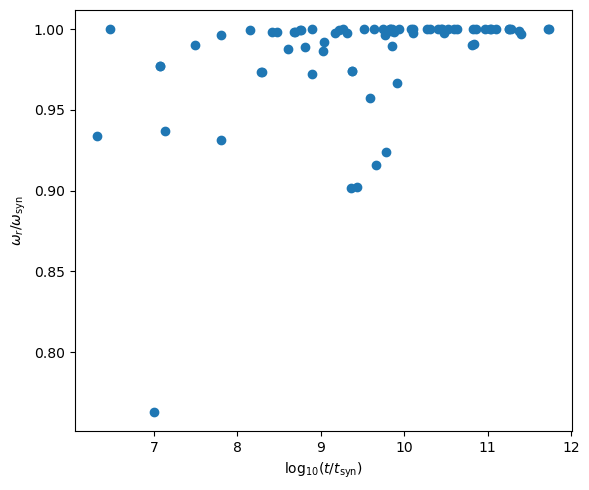

In [85]:
#generate the plot
plt.figure(figsize=(6,5))
plt.scatter(np.log10(xsys), wrsyn)
plt.xlabel(r'$\log_{10}(t / t_{\rm syn})$')
plt.ylabel(r'$\omega_r / \omega_{\rm syn}$')
plt.tight_layout()
plt.show()

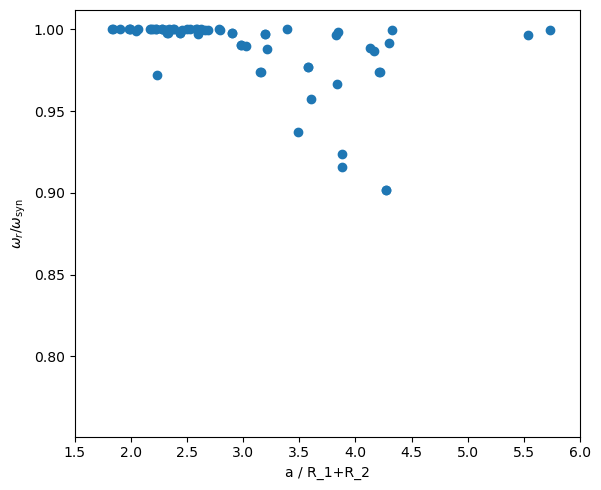

In [86]:
newx = new_x(a, R1*u.R_sun, R2*u.R_sun, PUrot, Asum).to_value('')
plt.figure(figsize=(6,5))
plt.scatter(newx, wrsyn)
plt.xlabel('a / R_1+R_2')
plt.ylabel(r'$\omega_r / \omega_{\rm syn}$')
plt.tight_layout()
plt.xlim(1.5,6)
plt.show()

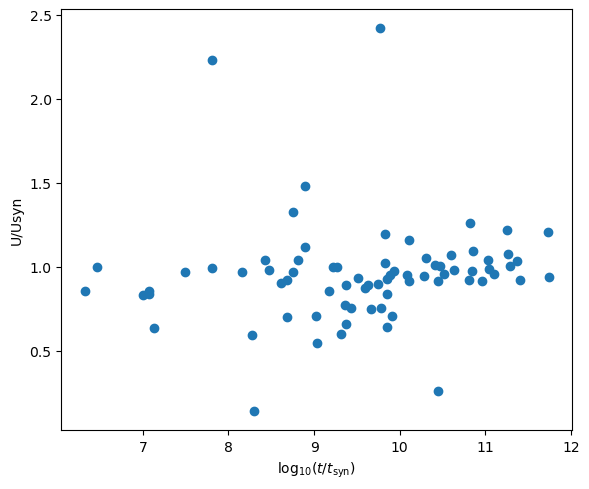

In [87]:
plt.figure(figsize=(6,5))
plt.scatter(np.log10(xsys), U_Usyn)
plt.xlabel(r'$\log_{10}(t / t_{\rm syn})$')
plt.ylabel('U/Usyn')
plt.tight_layout()
plt.show()